# BIA-652 Assignment 1. Intro to Pandas

Note: Please **DO NOT** share your answers with anyone, including uploading to Github, Course Hero, etc. 

### Your Name: Rohan Bangera

In [1]:
import numpy as np #numerical computation
import pandas as pd #processing dataframes

Use the `RegularSeasonCompactResults` data to answer the following questions:  

In [2]:
# Download example data set
import urllib.request
from zipfile import ZipFile

urllib.request.urlretrieve("http://fengmai.net/download/data/bia652/pandas_data.zip", 
                           "pandas_data.zip")
ZipFile("pandas_data.zip").extractall()
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

__Q1: Create a new column `total_score` as the sum of Wscore and Lscore.__ 

In [43]:
df.head()


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [44]:
df['total_score'] = (df['Wscore'] + df['Lscore'])
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_score
0,1985,20,1228,81,1328,64,N,0,145
1,1985,25,1106,77,1354,70,H,0,147
2,1985,25,1112,63,1223,56,H,0,119
3,1985,25,1165,70,1432,54,H,0,124
4,1985,25,1192,86,1447,74,H,0,160


__Q2: What is the min, max, average, and median of the total_score?__ 

In [33]:
min= df['total_score'].min()
print('mean=',min)


mean= 62


In [34]:
max=df['total_score'].max()
print('max=',max)

max= 331


In [35]:
avg=df['total_score'].mean()
print('average=',avg)

average= 141.0973301488757


In [36]:
median=df['total_score'].median()
print('median=',median)

median= 140.0


__Q3: Find the average total score for each year (season).__ 

In [45]:
mean_total_score = df.groupby(['Season'])[['total_score']].mean()
mean_total_score

,total_score
Season,
1985,138.583356
1986,138.447528
1987,144.764496
1988,147.470796
1989,151.259351
1990,149.680099
1991,152.791171
1992,147.136661
1993,146.810648


__Q4: Plot a time series plot of average total score by year (season)__ 

Hint: search Google for: how to plot a pandas series or [read the user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)


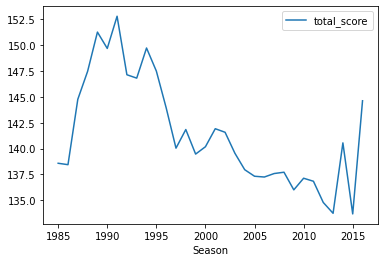

In [46]:
mean_total_score.plot()


__Q5: Which year has the highest percentage of blowout games, which is defined as a winning margin of at least 30 points?__ 



In [47]:
df_1 = df['Season'].value_counts().to_frame()
df_1
df['Blowout'] = df['Wscore']-df['Lscore']
df['Blowout']
df_2 = df[(df['Blowout']>= 30)]
df_2
df_1['Blowout'] = df_2.groupby(['Season'])[['Blowout']].count()
df_1['Blowout %'] = (df_1['Blowout']/df_1['Season'])*100
df_1['Blowout %']
df_1 = df_1.sort_values('Blowout %', ascending = False)
df_1.head(1)


,Season,Blowout,Blowout %
1991,4123,291,7.057967


**Q6: For each team and season combination,   
a) find the average number of points scored by the team per game in each season;  
b) plot the average points scored by team 1461 by year.**

Hint: This requires you to consider both the case when the team won (Wscore) and when the team lost (Lscore).  
Your answer for each team-year combination should be between Wscore_when_winning and Lscore_when_losing in the last dataframe of the tutorial. 

In [18]:
#a
a = df.groupby(['Wteam', 'Season'])[['Wscore']].mean().reset_index()
b = df.groupby(['Lteam', 'Season'])[['Lscore']].mean().reset_index()
a.head()
b.head()
avg = pd.merge(a, b, how='inner', left_on=['Wteam', 'Season'], right_on=['Lteam', 'Season'], 
      suffixes=('When_Winning', 'When_Losing')).drop(columns='Lteam').rename(columns={"Wteam": "Team"})
avg['AvgScore'] = (avg['Wscore'] + avg['Lscore'])/2
avg.sort_values('Team')
avg


,Team,Season,Wscore,Lscore,AvgScore
0,1101,2014,80.000000,61.368421,70.684211
1,1101,2015,77.428571,55.523810,66.476190
2,1101,2016,78.222222,65.666667,71.944444
3,1102,1985,71.000000,61.000000,66.000000
4,1102,1986,66.500000,56.052632,61.276316
...,...,...,...,...,...
10164,1464,2012,69.428571,64.933333,67.180952
10165,1464,2013,72.428571,64.933333,68.680952
10166,1464,2014,74.666667,74.764706,74.715686
10167,1464,2015,78.625000,67.857143,73.241071


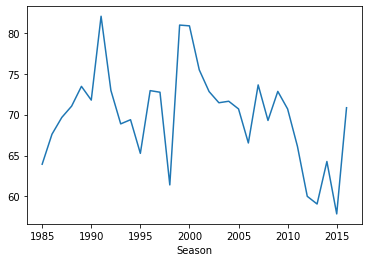

In [19]:
#b
avg.query('Team==1461').groupby(['Season'])['AvgScore'].mean().plot()